### This file plots the processed csv files with matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [2]:
date = '2018-12-07_09h02'
worker_list = [8,16,32,64]
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/' + date + '/'

## Throughput plot for read loads

In [32]:
# read data into pandas dataframe
df_tp = pd.read_csv(base_path + 'two_mws_tp.csv')
df_tp

,client,worker,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,6,8,3148.750000,4.456227,2935.427778,11.206582
1,6,16,3132.772222,35.193782,2940.411111,0.816081
2,6,32,3112.283333,17.630576,2942.955556,2.412020
3,6,64,3168.150000,40.507702,2943.822222,1.330854
4,24,8,8326.405556,9.185751,2949.383333,2.292863
5,24,16,8574.994444,6.372922,2950.716667,6.254791
6,24,32,8414.322222,81.624393,2952.761111,2.861537
7,24,64,8327.433333,55.122738,2950.750000,5.512074
8,48,8,9406.650000,65.989481,2944.127778,3.003773
9,48,16,10328.627778,81.836708,2941.916667,0.968772


In [5]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

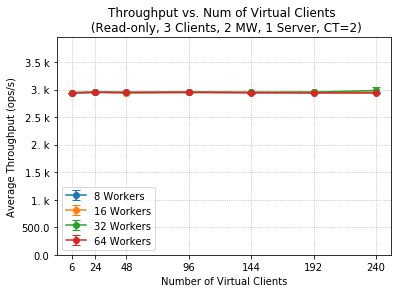

In [34]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Read-only, 3 Clients, 2 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['read_tp_mean']
    std = df_tp_cut['read_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0,top=1e3+np.mean(df_tp['read_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_tp_read.png", dpi = 150)


## Throughput plot for write loads

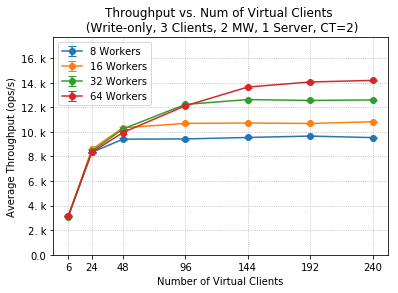

In [44]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['write_tp_mean']
    std = df_tp_cut['write_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0,top=8e3+np.mean(df_tp['write_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_tp_write.png", dpi = 150)


## Response-time plot for read loads

In [22]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'two_mws_rt.csv')
df_rt

,client,worker,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,6,8,1.109057,0.003469,1.184409,0.008909
1,6,16,1.123300,0.004150,1.188943,0.008311
2,6,32,1.113945,0.015258,1.189051,0.003539
3,6,64,1.087687,0.014177,1.192907,0.002436
4,24,8,1.947958,0.025026,7.213242,0.012006
5,24,16,1.939457,0.029545,7.154732,0.057116
6,24,32,1.991043,0.025069,7.197370,0.008043
7,24,64,2.024940,0.023357,7.188826,0.011960
8,48,8,4.207304,0.031648,15.315803,0.101757
9,48,16,3.670689,0.031426,15.161477,0.149738


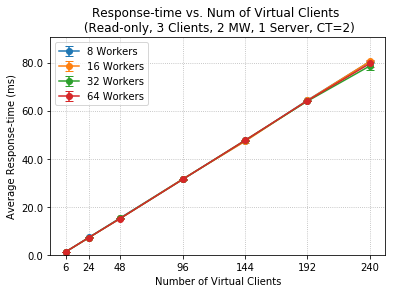

In [38]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 2 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['read_rt_mean']
    std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['read_rt_mean'])+10)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_rt_read.png", dpi = 150)


## Response-time plot for write loads

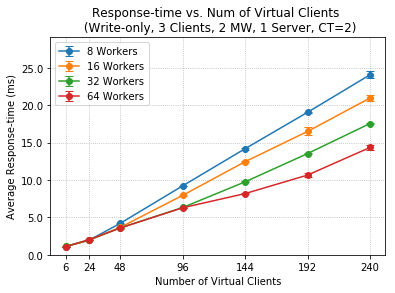

In [45]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    std = df_rt_cut['write_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_rt_write.png", dpi = 150)


## Queue length plot for read loads

In [25]:
# read data into pandas dataframe
df_ql = pd.read_csv(base_path + 'two_mws_queuelength.csv')
df_ql

,client,worker,read_queueLength,read_queueLength_std,write_queueLength,write_queueLength_std
0,6,8,1.165511,0.010899,1.141582,0.019174
1,6,16,1.180367,0.029503,1.140837,0.006216
2,6,32,1.184746,0.013294,1.123597,0.004793
3,6,64,1.170356,0.005428,1.125454,0.005020
4,24,8,2.363415,0.018541,1.915085,0.025842
5,24,16,3.213312,0.075011,2.037782,0.016325
6,24,32,3.162392,0.064659,1.967622,0.036300
7,24,64,3.159251,0.063857,1.891036,0.025093
8,48,8,11.626756,0.140597,10.667013,0.151631
9,48,16,4.402162,0.011081,3.467925,0.020507


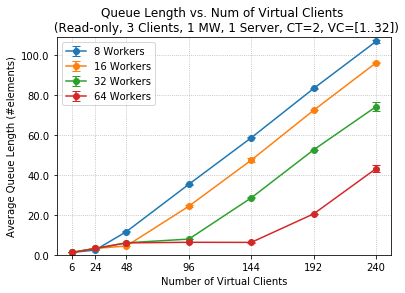

In [26]:
f = plt.figure()
plt.title("Queue Length vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..32])")

for worker in worker_list:
    # extract values of interest
    df_ql_cut = df_ql[(df_ql.worker == worker)]
    
    vcs = df_ql_cut['client']
    tps = df_ql_cut['read_queueLength']
    std = df_ql_cut[' read_queueLength_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Queue Length (#elements)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_ql['read_queueLength'])+2)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_queuelength_read.png", dpi = 150)


## Queue length plot for write loads

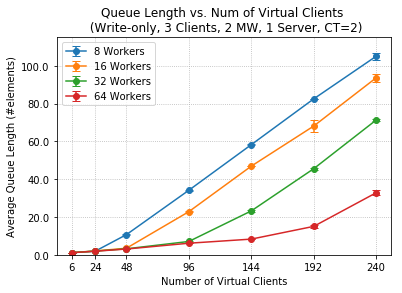

In [46]:
f = plt.figure()
plt.title("Queue Length vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_ql_cut = df_ql[(df_ql.worker == worker)]
    
    vcs = df_ql_cut['client']
    tps = df_ql_cut['write_queueLength']
    std = df_ql_cut['write_queueLength_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Queue Length (#elements)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_ql['write_queueLength'])+10)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_queuelength_write.png", dpi = 150)


## Response-time breakdown histogram for read loads

In [28]:
# read data into pandas dataframe
df_b = pd.read_csv(base_path + 'two_mws_rt_breakdown.csv')
df_b

,client,worker,read_netthreadTime,read_queueTime,read_workerPreTime,read_memcachedRTT,read_workerPostTime,write_netthreadTime,write_queueTime,write_workerPreTime,write_memcachedRTT,write_workerPostTime
0,6,8,0.016126,0.076965,0.013761,1.061654,0.015902,0.028955,0.075439,0.013215,0.959622,0.031825
1,6,16,0.015790,0.078805,0.013816,1.064392,0.016140,0.028643,0.080207,0.013420,0.968805,0.032225
2,6,32,0.016117,0.081769,0.014717,1.059620,0.016828,0.029103,0.075778,0.013874,0.962614,0.032576
3,6,64,0.016163,0.081711,0.014901,1.063457,0.016676,0.029825,0.084146,0.014763,0.927858,0.031095
4,24,8,0.016527,2.133203,0.017888,5.026685,0.018938,0.031543,0.404022,0.015069,1.453630,0.043694
5,24,16,0.015841,0.242730,0.016516,6.860184,0.019462,0.029355,0.161407,0.014943,1.693434,0.040318
6,24,32,0.015731,0.235364,0.016926,6.909386,0.019962,0.030688,0.159757,0.016066,1.742302,0.042231
7,24,64,0.016278,0.228000,0.017864,6.906364,0.020320,0.033083,0.158351,0.018124,1.768020,0.047363
8,48,8,0.014379,9.878612,0.021149,5.381689,0.019973,0.030451,2.492567,0.016284,1.619291,0.048712
9,48,16,0.017748,4.657670,0.025013,10.441161,0.019885,0.032625,0.898356,0.019826,2.665083,0.054800


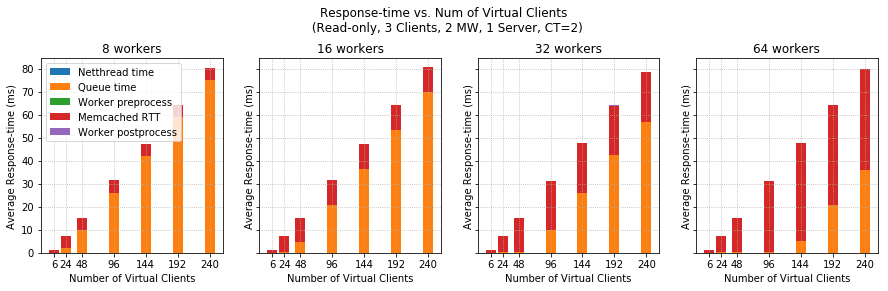

In [37]:
f, ax = plt.subplots(1, len(worker_list), sharex='col', sharey='row')
f.suptitle("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 2 MW, 1 Server, CT=2)")
f.subplots_adjust(top=0.8)
f.set_figwidth(15)
i=0

for worker in worker_list:
    # extract values of interest
    df_b_cut = df_b[(df_b.worker == worker)]
    
    vcs = df_b_cut['client']
    net_time = df_b_cut['read_netthreadTime']
    queue_time = df_b_cut['read_queueTime']
    workerPreTime = df_b_cut['read_workerPreTime']
    memcachedRTT = df_b_cut['read_memcachedRTT']
    workerPostTime = df_b_cut['read_workerPostTime']

    width = 15       # the width of the bars: can also be len(x) sequence
    ax[i].bar(vcs, net_time, width, label='Netthread time')
    ax[i].bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
    ax[i].bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
    ax[i].bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
    ax[i].bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

    ax[i].grid(linestyle = "dotted")
    ax[i].set_ylabel("Average Response-time (ms)")
    ax[i].set_xlabel("Number of Virtual Clients")
    ax[i].set_xticks([0] + np.array(vcs))
    ax[i].set_ylim(bottom=0)
    ax[i].set_title('{} workers'.format(worker))
    if i==0:
        ax[i].legend()
    
    i += 1

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_rt_breakdown_read.png", dpi = 150)


## Response-time breakdown histogram for write loads

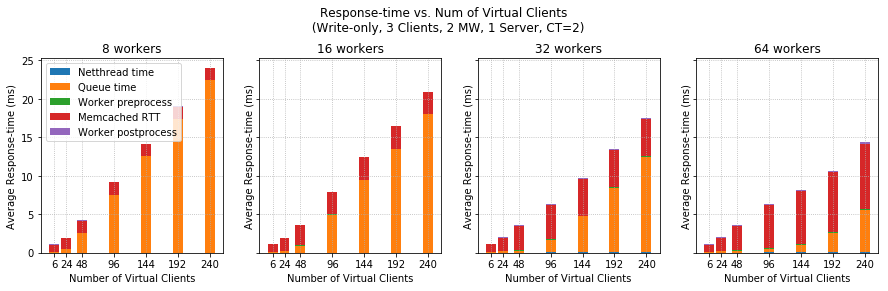

In [47]:
#f = plt.figure()
f, ax = plt.subplots(1, len(worker_list), sharex='col', sharey='row')
f.suptitle("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MW, 1 Server, CT=2)")
f.subplots_adjust(top=0.8)
f.set_figwidth(15)


i=0
for worker in worker_list:
    # extract values of interest
    df_b_cut = df_b[(df_b.worker == worker)]
    
    vcs = df_b_cut['client']
    net_time = df_b_cut['write_netthreadTime']
    queue_time = df_b_cut['write_queueTime']
    workerPreTime = df_b_cut['write_workerPreTime']
    memcachedRTT = df_b_cut['write_memcachedRTT']
    workerPostTime = df_b_cut['write_workerPostTime']

    width = 15       # the width of the bars: can also be len(x) sequence
    ax[i].bar(vcs, net_time, width, label='Netthread time')
    ax[i].bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
    ax[i].bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
    ax[i].bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
    ax[i].bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

    ax[i].grid(linestyle = "dotted")
    ax[i].set_ylabel("Average Response-time (ms)")
    ax[i].set_xlabel("Number of Virtual Clients")
    ax[i].set_xticks([0] + np.array(vcs))
    ax[i].set_ylim(bottom=0)
    ax[i].set_title('{} workers'.format(worker))
    if i==0:
        ax[i].legend()
    
    i += 1

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/two_mws_rt_breakdown_write.png", dpi = 150)


## Time in front of net-thread plot for write loads

In [3]:
# read data into pandas dataframe
df_rt_mw = pd.read_csv(base_path + 'two_mws_rt.csv')
df_rt_mw = df_rt_mw[df_rt_mw['client'] <= 192]
df_rt_mem = pd.read_csv(base_path + 'two_mws_mem_rt.csv')
df_rt_mem = df_rt_mem[df_rt_mem['client'] <= 192]
print(df_rt_mw)
df_rt = df_rt_mw
df_rt['write_rt_mean'] = df_rt_mem['write_rt_mean']-df_rt_mw['write_rt_mean']
print(df_rt)

    client  worker  write_rt_mean  write_rt_std  read_rt_mean  read_rt_std
0        6       8       1.109057      0.003469      1.184409     0.008909
1        6      16       1.123300      0.004150      1.188943     0.008311
2        6      32       1.113945      0.015258      1.189051     0.003539
3        6      64       1.087687      0.014177      1.192907     0.002436
4       24       8       1.947958      0.025026      7.213242     0.012006
5       24      16       1.939457      0.029545      7.154732     0.057116
6       24      32       1.991043      0.025069      7.197370     0.008043
7       24      64       2.024940      0.023357      7.188826     0.011960
8       48       8       4.207304      0.031648     15.315803     0.101757
9       48      16       3.670689      0.031426     15.161477     0.149738
10      48      32       3.603601      0.038584     15.131663     0.078662
11      48      64       3.583151      0.071629     15.105366     0.049047
12      96       8       

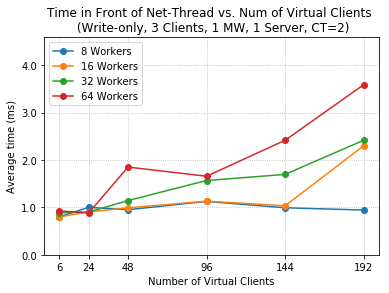

In [6]:
f = plt.figure()
plt.title("Time in Front of Net-Thread vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    #std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = None, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+1)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
#f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_write_front_netthread.png", dpi = 150)